# EDA & Modeling

In [1]:
random_state = 42

## Package loading

In [2]:
from modules.ezs_func import *
from modules.ezs_model import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer


## Project name

In [3]:
name = 'water'

# Exploratory Data Analysis 

## Thresholds & other parameters

In [4]:
problem_type = 'classification'

In [5]:
data_size = 'small'

In [6]:
threshold_NaN = 0.5

In [7]:
threshold_cat = 5

In [8]:
threshold_Z = 3.0

In [9]:
test_size = 0.33

In [10]:
threshold_entropy = 0.75

In [11]:
undersampling = False

In [12]:
undersampler = 'Random'

In [13]:
threshold_corr = 1.0

In [14]:
threshold_model = 5

In [15]:
threshold_score = 0.7

In [16]:
threshold_feature = 5

In [17]:
with_keras = False

In [18]:
CPU = False

In [19]:
time_dep = False

In [20]:
date_idx = 0

In [21]:
lag_number = 3

In [22]:
level_1_model = 'regression'

## File & target

In [23]:
path = '/home/fifi/Documents/ezstacking/dataset/water quality.csv'

In [24]:
df = pd.read_csv(path)

In [25]:
target_col = 'Water_Quality'

### Deployment

In [26]:
FastAPI_port = 8000

In [27]:
Docker_port = 80

# Drop user's columns & Duplicates:

In [28]:
user_drop_cols = []

Dataset before deletion

In [29]:
display(df)

Temperature  Dissolved_Oxygen    pH  BioChemical_Oxygen_Demand  \
0            7.5              9.95  7.85                       0.15   
1           11.0              9.65  7.70                       0.45   
2            7.5              9.90  7.65                       0.55   
3            8.5              9.65  7.55                       0.35   
4           10.0              9.55  7.80                       0.25   
..           ...               ...   ...                        ...   
290         28.0              6.95  7.85                       0.37   
291         28.0              6.90  7.95                       0.60   
292         25.0              7.40  7.70                       0.55   
293         28.0              6.75  7.90                       0.70   
294         28.5              6.50  7.95                       0.90   

     Fecal_Streptococci  Nitrate  Fecal_Coliform  Total_Coliform  \
0                 90.00    0.255            22.5           180.0   
1                205.00    0.200            62.5           410.0   
2                100.00    0.100            26.0           200.0   
3                300.00    0.250            97.5           600.0   
4                190.00    0.150            47.5           380.0   
..                  ...      ...             ...             ...   
290               28.00    0.115            25.0            56.0   
291               27.75    0.150            23.0            55.5   
292               60.75    0.500            15.0           121.5   
293               35.00    0.000            27.0            70.0   
294              140.00    0.000            79.5           280.0   

     Conductivity  Water_Quality  
0           134.5              0  
1            77.0              1  
2           101.5              0  
3           148.0              0  
4           106.0              1  
..            ...            ...  
290         281.5              0  
291         274.0              1  
292         286.0              0  
293        1572.5              1  
294        9272.0              1  

[295 rows x 10 columns]

In [30]:
df = df.drop(user_drop_cols, axis=1)

Duplicate rows:

In [31]:
df = duplicates(df)

No duplicate rows.


Dataset after deletion of user’s columns and duplicates

In [32]:
display(df)

Temperature  Dissolved_Oxygen    pH  BioChemical_Oxygen_Demand  \
0            7.5              9.95  7.85                       0.15   
1           11.0              9.65  7.70                       0.45   
2            7.5              9.90  7.65                       0.55   
3            8.5              9.65  7.55                       0.35   
4           10.0              9.55  7.80                       0.25   
..           ...               ...   ...                        ...   
290         28.0              6.95  7.85                       0.37   
291         28.0              6.90  7.95                       0.60   
292         25.0              7.40  7.70                       0.55   
293         28.0              6.75  7.90                       0.70   
294         28.5              6.50  7.95                       0.90   

     Fecal_Streptococci  Nitrate  Fecal_Coliform  Total_Coliform  \
0                 90.00    0.255            22.5           180.0   
1                205.00    0.200            62.5           410.0   
2                100.00    0.100            26.0           200.0   
3                300.00    0.250            97.5           600.0   
4                190.00    0.150            47.5           380.0   
..                  ...      ...             ...             ...   
290               28.00    0.115            25.0            56.0   
291               27.75    0.150            23.0            55.5   
292               60.75    0.500            15.0           121.5   
293               35.00    0.000            27.0            70.0   
294              140.00    0.000            79.5           280.0   

     Conductivity  Water_Quality  
0           134.5              0  
1            77.0              1  
2           101.5              0  
3           148.0              0  
4           106.0              1  
..            ...            ...  
290         281.5              0  
291         274.0              1  
292         286.0              0  
293        1572.5              1  
294        9272.0              1  

[295 rows x 10 columns]

### Dataset copy

In [33]:
df_copy = df.copy()

# Dataset Information

### Dataframe structure

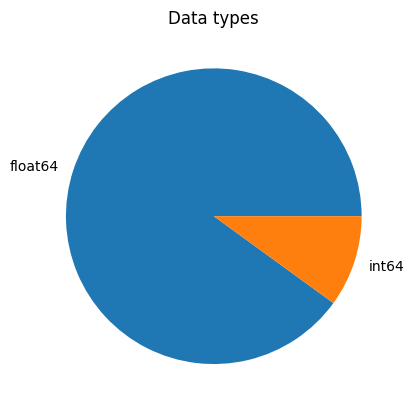

In [34]:
plot_dataframe_structure(df)

### Dataframe statistics

In [35]:
display(df.describe().T)

count          mean           std   min      25%  \
Temperature                295.0     20.903898      6.051566  0.00   18.000   
Dissolved_Oxygen           295.0      7.342034      1.910113  0.00    6.850   
pH                         295.0      7.754627      0.378879  5.35    7.550   
BioChemical_Oxygen_Demand  295.0      3.544136      9.043299  0.00    0.725   
Fecal_Streptococci         295.0   7463.333729  26272.135186  0.00   29.225   
Nitrate                    295.0      0.870915      1.431247  0.00    0.155   
Fecal_Coliform             295.0   5983.661695  22934.986514  0.00    4.000   
Total_Coliform             295.0  14926.667458  52544.270371  0.00   58.450   
Conductivity               295.0    501.860678    798.311280  0.00  208.250   
Water_Quality              295.0      0.383051      0.486957  0.00    0.000   

                              50%      75%        max  
Temperature                 22.50    25.55      30.50  
Dissolved_Oxygen             7.75     8.60      10.25  
pH                           7.75     8.00       8.60  
BioChemical_Oxygen_Demand    1.60     3.10     123.50  
Fecal_Streptococci         240.00  2650.00  229000.00  
Nitrate                      0.55     0.95      14.05  
Fecal_Coliform              79.50  2375.00  251000.00  
Total_Coliform             480.00  5300.00  458000.00  
Conductivity               299.50   438.25    9272.00  
Water_Quality                0.00     1.00       1.00

### Which columns could be categorical ?

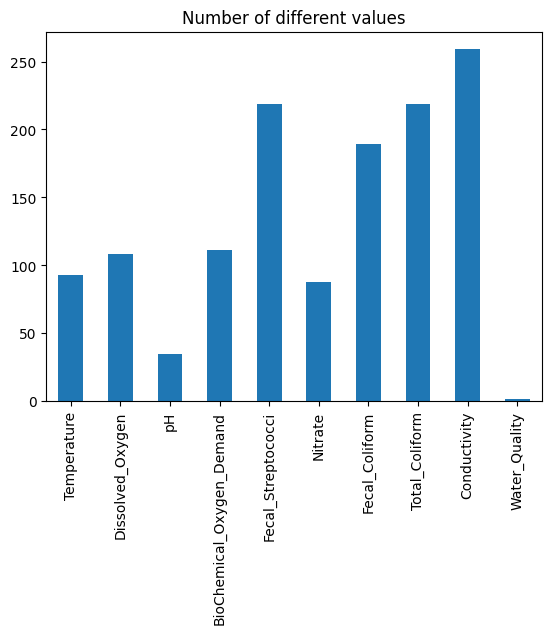

In [36]:
plot_categorical(df)

# Dataset Cleaning

### Drop NaN:

In [37]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [38]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [39]:
display(dropped_cols)

array([], dtype=float64)

### Encoding data:

In [40]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Temperature
Encoding numeric column: Dissolved_Oxygen
Encoding numeric column: pH
Encoding numeric column: BioChemical_Oxygen_Demand
Encoding numeric column: Fecal_Streptococci
Encoding numeric column: Nitrate
Encoding numeric column: Fecal_Coliform
Encoding numeric column: Total_Coliform
Encoding numeric column: Conductivity
Column  Water_Quality  is categorical.


### Imputing NaN using IterativeImputer

#### Imputation

In [41]:
df = imputation(df)

No need to impute data.


### Data compression:

In [42]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.02MB
Memory usage after optimization is: 0.01MB
Decreased by 75.8%


#### Dataframe structure after compression

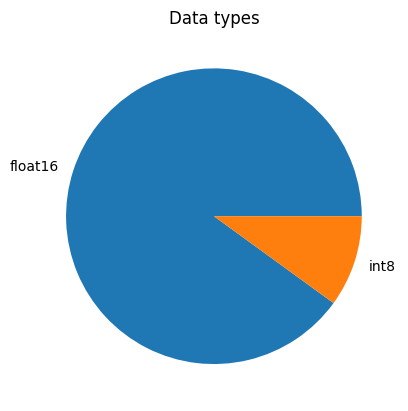

In [43]:
plot_dataframe_structure(df)

### Outliers:

In [44]:
df = outliers(df, threshold_Z)

Using Z_score,  29  rows will be suppressed.


# Correlation according to Pearson

In [45]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [46]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

### Check columns that should be dropped

In [47]:
print(dropped_cols)

[]


# Correlation according to Spearman (hierarchical clustering)

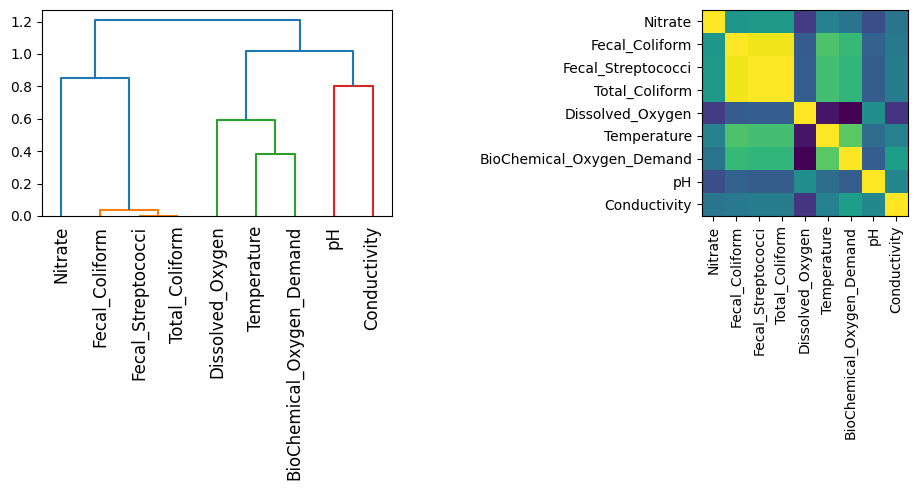

In [48]:
hierarchical_clustering(df.drop(target_col, axis=1))

# Class balancing

In [49]:
print('Entropy = ', shannon_entropy(df[target_col]))

Entropy =  0.930320524843581


# Splittings 

In [50]:
df = df_copy

## Splitting dataframe in features and targets

In [51]:
y = df[target_col]

In [52]:
X = df.drop(target_col, axis=1)

## Dimensions

In [53]:
nb_features = len(X.columns.tolist())

In [54]:
nb_targets = len(y.unique())

In [55]:
layer_size = nb_features + nb_targets + 2

## Splitting data in train and test sets 

In [56]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling=undersampling, undersampler=undersampler, random_state=random_state)

## Encoding

In [57]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

# Modeling

## Model building

### Pipeline building

#### Select the categorical and numerical columns

In [58]:
cat_selector = make_column_selector(dtype_include=object)

In [59]:
num_selector = make_column_selector(dtype_include=np.number)

#### For models based on tree

In [60]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [61]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True))

In [62]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

#### For models not based on tree

In [63]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [64]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler())

In [65]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

#### Level-0 models

In [66]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCQ', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTCG', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='gini', random_state = random_state))), 
          ('DTCE', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='entropy', random_state = random_state))), 
          ('RFCG', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=100, random_state = random_state))), 
          ('RFCE', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='entropy', n_estimators=100, random_state = random_state))), 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True, random_state = random_state))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, random_state = random_state))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2', random_state = random_state))), 
          ('KNCU', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='uniform', n_neighbors=len(y.unique())))), 
          ('KNCD', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='distance', n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ('SVCL', make_pipeline(ntree_preprocessor, SVC(kernel='linear', random_state = random_state))), 
          ('SVCP', make_pipeline(ntree_preprocessor, SVC(kernel='poly', random_state = random_state))), 
          ('SVCG', make_pipeline(ntree_preprocessor, SVC(kernel='rbf', random_state = random_state))), 
          ('SVCS', make_pipeline(ntree_preprocessor, SVC(kernel='sigmoid', random_state = random_state))), 
          ]

#### Level-1 model

In [67]:
level_1 = LogisticRegression(random_state = random_state)

#### Stacking for classification

In [68]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

# Model fitting

In [69]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was rea

CPU times: user 507 ms, sys: 219 ms, total: 727 ms
Wall time: 15.2 s


StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42)),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler())]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4c51e74fd0>),
                                                                                 ('pipeline-2',
                                                                                  Pipe...
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4c51e4bd30>)])),
                                                ('svc',
                                                 SVC(kernel='sigmoid',
                                                     random_state=42))]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Model evaluation

### Model scoring

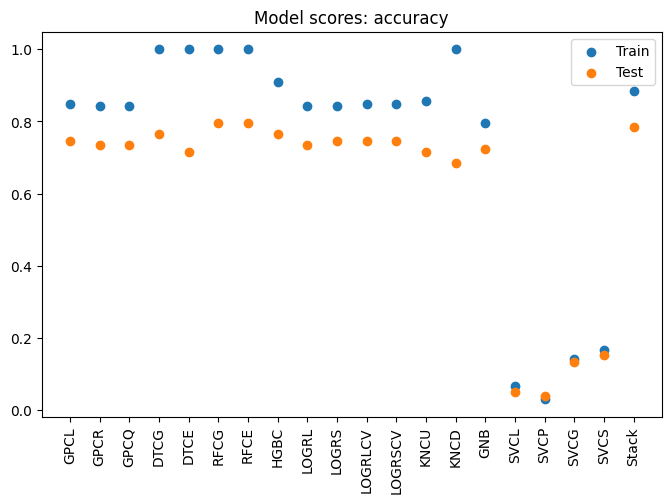

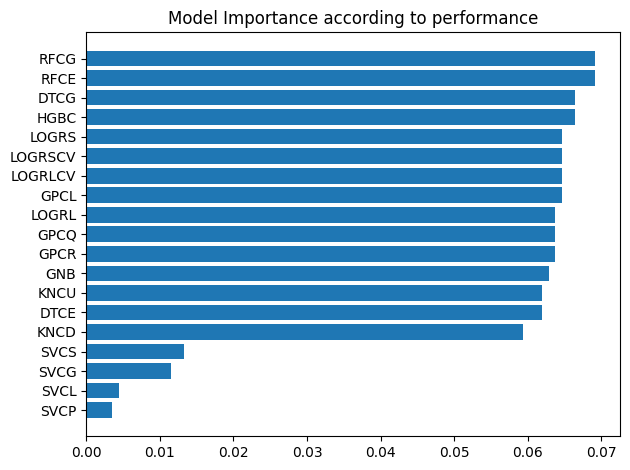

In [70]:
score_stack_0, mod_imp_score_0 = score_stacking(model, X_train, y_train, X_test, y_test)

### Classification report

In [71]:
K_classification_report(model, X_train, y_train, X_test, y_test)

### Confusion matrix

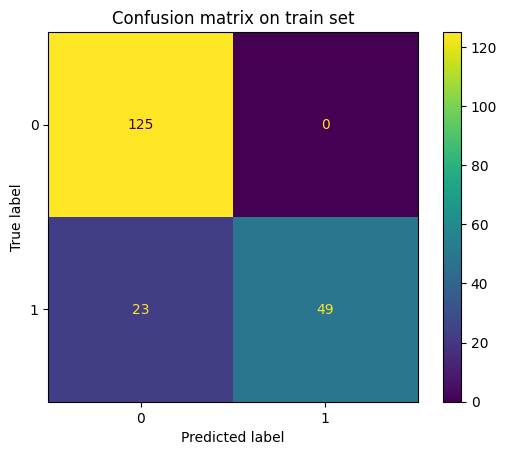

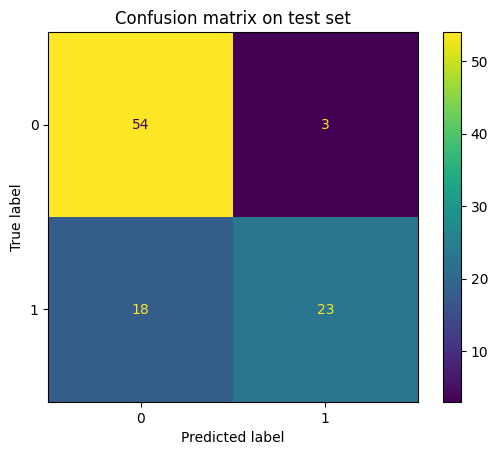

In [72]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

# Model inspection

### Model importance

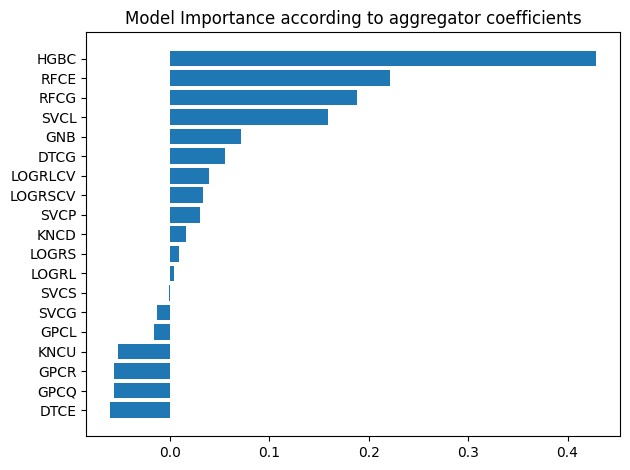

In [73]:
model_imp_0 = plot_model_importance(model, level_1_model)

### Feature permutation importance

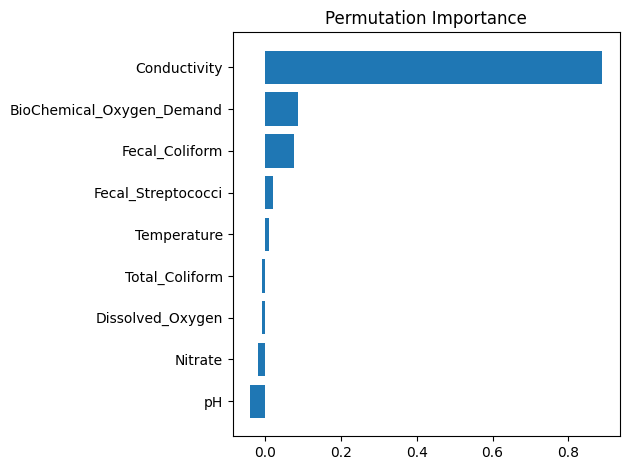

In [74]:
feature_importance_0 = plot_perm_importance(model, X_test, y_test, CPU)

# Level-0 model elimination

#### Filtered Level-0 models

In [75]:
level_0_f = model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)

#### Level-1 model with filtration

In [76]:
level_1 = LogisticRegression(random_state = random_state)

#### Build filtered model

In [77]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

# Filtered Model fitting

In [78]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 102 ms, sys: 8.72 ms, total: 111 ms
Wall time: 2.71 s


StackingClassifier(estimators=[('DTCG',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4c51e74fd0>),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleI...
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4c51e74fd0>),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4c51e4bd30>)])),
                                                ('gaussiannb',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Filtered Model evaluation

### Filtered Model scoring

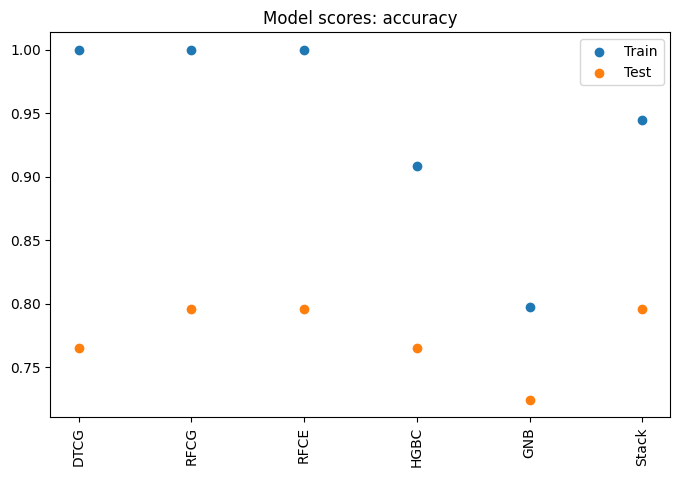

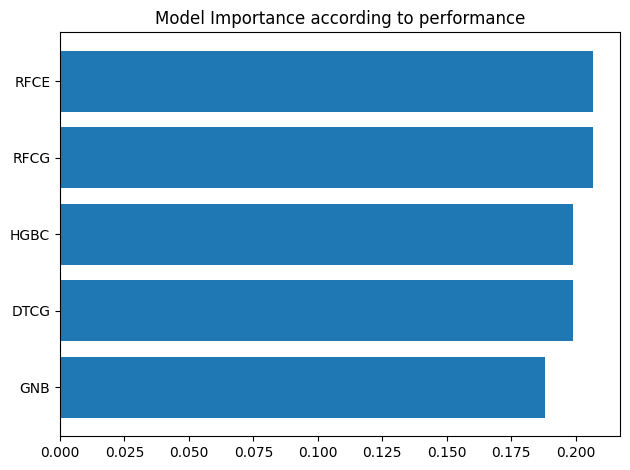

In [79]:
score_stack_1, mod_imp_score_1 = score_stacking(model, X_train, y_train, X_test, y_test)

### Filtered Confusion matrix

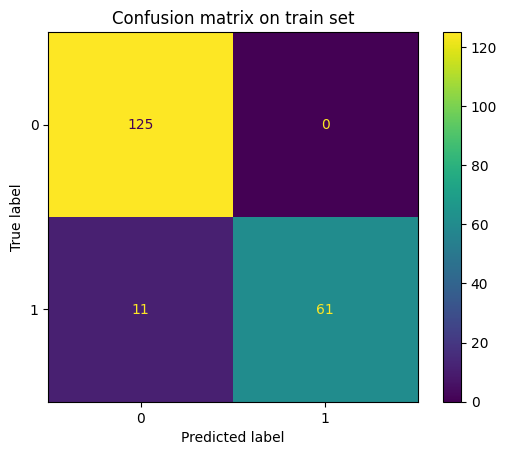

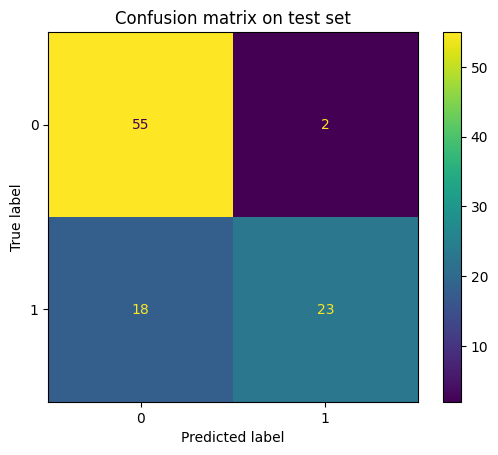

In [80]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

# Filtered Model inspection

### Filtered Model importance

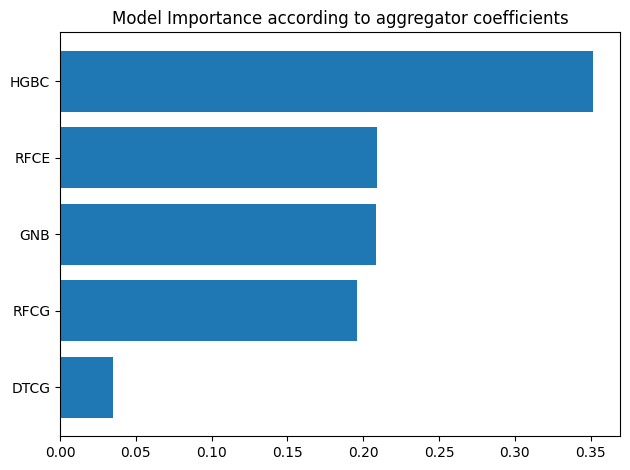

In [81]:
model_imp_1 = plot_model_importance(model, level_1_model)

### Filtered feature permutation importance

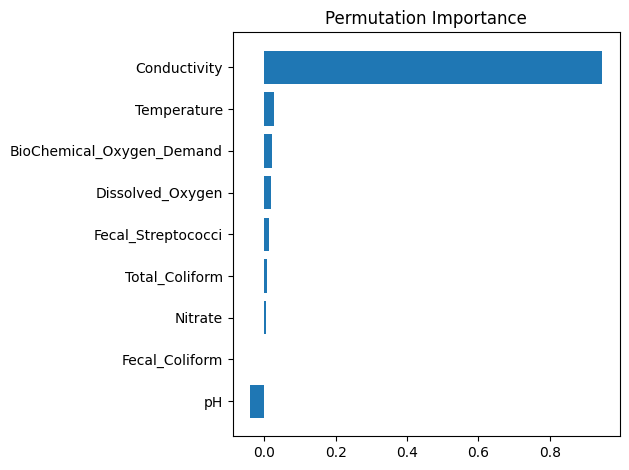

In [82]:
feature_importance_1 = plot_perm_importance(model, X_test, y_test, CPU)

#### Filtered feature elimination

In [83]:
best_feature, worst_feature = feature_filtering(feature_importance_1, threshold_feature)

In [84]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

### Check those columns, they should be dropped

In [85]:
print(dropped_cols)

['Fecal_Coliform', 'Nitrate', 'Total_Coliform', 'pH']


# Final Model

In [86]:
df = df_copy.drop(dropped_cols, axis=1, errors='ignore')

In [87]:
reduce_schema('column_name', dropped_cols)

# Splitting

In [88]:
y = df[target_col] 

In [89]:
X = df.drop(target_col, axis=1) 

## Dimensions

In [90]:
nb_features = len(X.columns.tolist()) 

In [91]:
nb_targets = len(y.unique()) 

In [92]:
layer_size = nb_features + nb_targets + 2 

## Splitting data in train and test sets 

In [93]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state) 

## Encoding

In [94]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test)) 

In [95]:
threshold_score = 0.7

#### Build final model

In [96]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

# Final Model fitting

In [97]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 112 ms, sys: 8.22 ms, total: 121 ms
Wall time: 2.8 s


StackingClassifier(estimators=[('DTCG',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4c51e74fd0>),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleI...
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4c51e74fd0>),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4c51e4bd30>)])),
                                                ('gaussiannb',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Final Model evaluation

### Final Model scoring

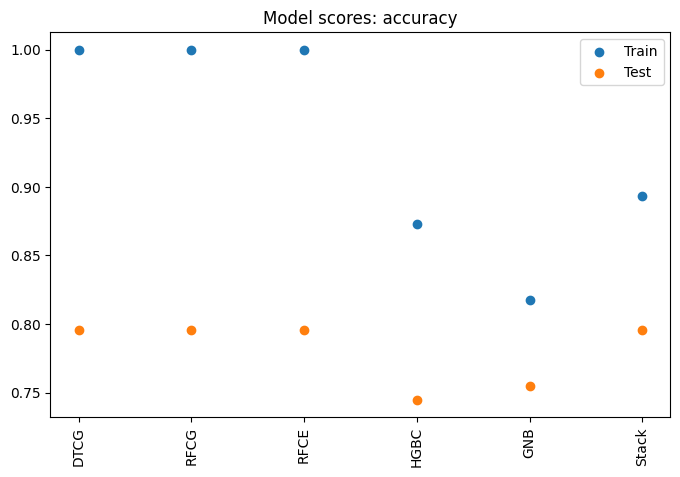

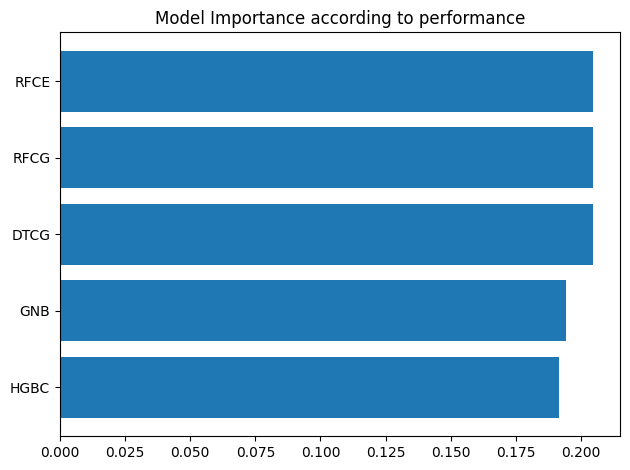

In [98]:
score_stack_2, mod_imp_score_2 = score_stacking(model, X_train, y_train, X_test, y_test)

### Final feature permutation importance

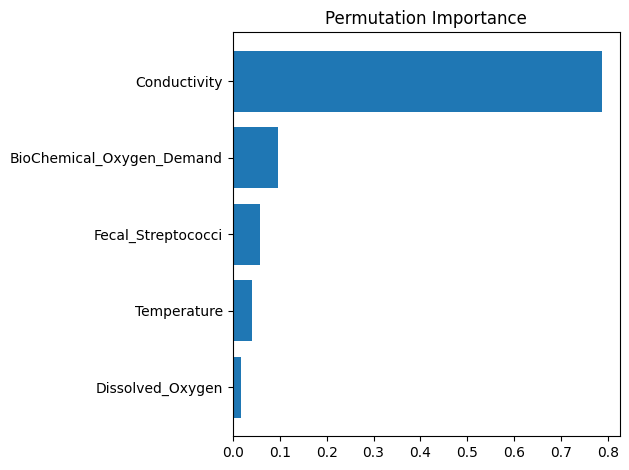

In [99]:
feature_importance_2 = feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

#### Final feature elimination

In [100]:
best_feature, worst_feature = feature_filtering(feature_importance_2, threshold_feature)

### Final Classification report

In [101]:
K_classification_report(model, X_train, y_train, X_test, y_test)

### Final Confusion matrix

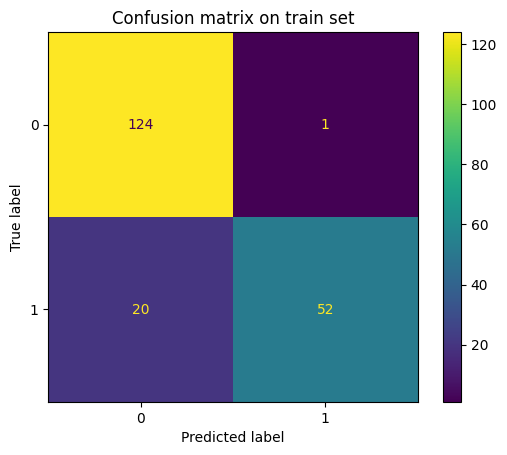

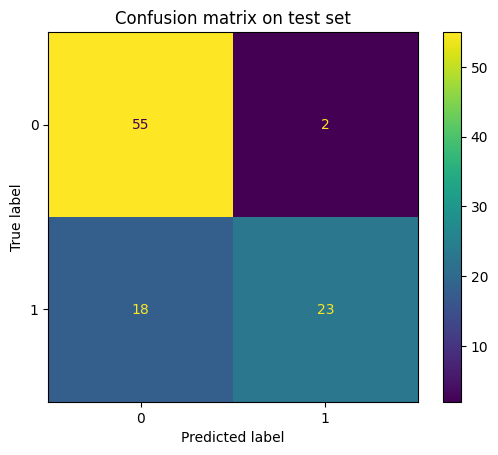

In [102]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

# Final Model inspection

### Final Model importance

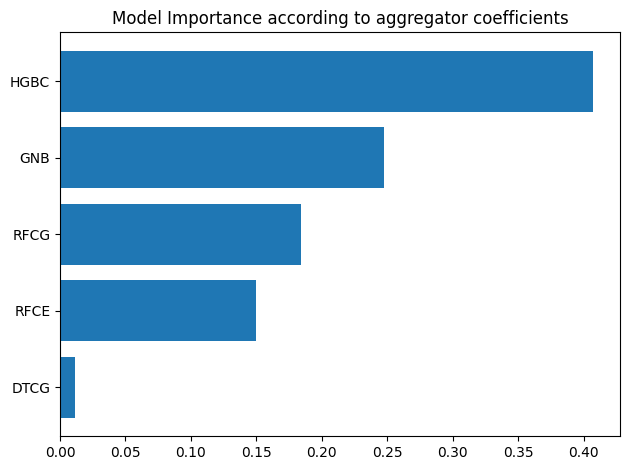

In [103]:
model_imp_2 = plot_model_importance(model, level_1_model)

### Final Feature permutation importance

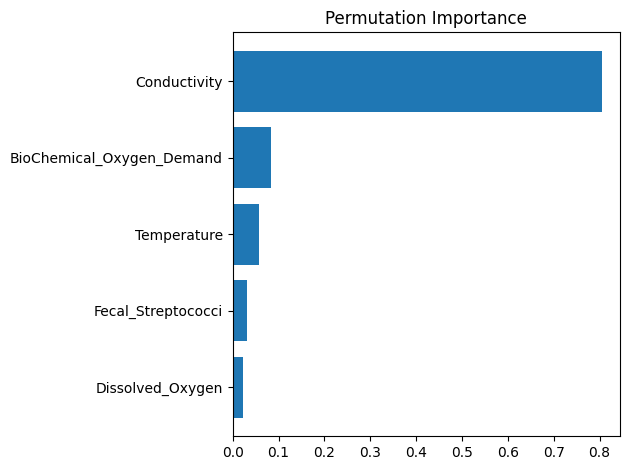

array([['Dissolved_Oxygen', 0.022222222222222244],
       ['Fecal_Streptococci', 0.031111111111111138],
       ['Temperature', 0.05777777777777784],
       ['BioChemical_Oxygen_Demand', 0.08444444444444452],
       ['Conductivity', 0.8044444444444442]], dtype=object)

In [104]:
plot_perm_importance(model, X_test, y_test, CPU)

### Final Partial Dependence & Individual Conditional Expectation 

In [105]:
pd_ice_plot(model=model, X=X_test, feature=X_test.columns.tolist(), CPU=CPU, target_encoder=target_encoder)

interactive(children=(Dropdown(description='feature', options=('Temperature', 'Dissolved_Oxygen', 'BioChemical…

# Deployment

## Save your model

In [106]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

## Generate your server

In [107]:
fastapi_server(model, 'model.sav', X, y, FastAPI_port, with_keras)

## [Test your API](./server.ipynb)

## Docker

In [108]:
dockerize(name, model, model_name, X, y, Docker_port, with_keras)